In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv("listings.csv")

def drop_single_value_columns(df):
    """ Function to drop columns with single value """
    df_col = df.columns
    df_col_drop = []
    for col in df_col:
        if len(df[col].value_counts()) == 1:
            df_col_drop.append(col)
    df.drop(columns=df_col_drop, inplace=True)

drop_single_value_columns(listings)

# I drop here all columns that useless for my analisys
listings.drop(columns=['listing_url', 'name', 'summary', 'description', 'space', 'neighborhood_overview', 'notes', 'transit',
                       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
                       'host_location', 'host_about', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count',
                       'host_has_profile_pic', 'host_identity_verified', 'city', 'state', 'zipcode', 'smart_location', 'is_location_exact',
                       'calendar_updated', 'first_review', 'last_review', 'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value', 'review_scores_cleanliness', 'number_of_reviews', 'review_scores_rating',
                       'review_scores_accuracy', 'instant_bookable', 'require_guest_profile_picture', 'license', 'require_guest_phone_verification',
                       'calculated_host_listings_count', 'square_feet', 'latitude', 'longitude', 'street', 'host_neighbourhood',
                       'neighbourhood', 'host_verifications', 'neighbourhood_cleansed', 'availability_60', 'availability_90', 'availability_365',
                       'weekly_price', 'monthly_price', 'maximum_nights', 'security_deposit',
                       'extra_people', 'reviews_per_month', 'minimum_nights', 'availability_30'
                      ], inplace=True)

tbd = ['host_verifications', 'street', 'latitude', 'longitude', 'host_since', 'host_neighbourhood', 'host_response_time', 'host_verifications', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'reviews_per_month']
# влияет способ связи на спрос?

print(listings.columns)
listings.describe()

Index(['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included',
       'cancellation_policy'],
      dtype='object')


,id,accommodates,bathrooms,bedrooms,beds,guests_included
count,3.818000e+03,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000
mean,5.550111e+06,3.349398,1.259469,1.307712,1.735394,1.672603
std,2.962660e+06,1.977599,0.590369,0.883395,1.139480,1.311040
min,3.335000e+03,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.258256e+06,2.000000,1.000000,1.000000,1.000000,1.000000
50%,6.118244e+06,3.000000,1.000000,1.000000,1.000000,1.000000
75%,8.035127e+06,4.000000,1.000000,2.000000,2.000000,2.000000
max,1.034016e+07,16.000000,8.000000,7.000000,15.000000,15.000000


In [3]:
listings.amenities.value_counts()

amenities = set()

for row in range(0, listings.shape[0]):
    amenities_row = list(listings['amenities'][row].strip('{}').split(','))
    for item in amenities_row:
        amenities.add(item)

for item in amenities:
    listings[item] = 0
    listings.loc[listings.amenities.map(set(item).issubset), item] = 1

listings.drop(columns='amenities', inplace=True)

listings.describe()

,id,accommodates,bathrooms,bedrooms,beds,guests_included,"""Smoke Detector""",Dog(s),,Shampoo,...,"""Other pet(s)""","""Elevator in Building""","""Hot Tub""","""Wheelchair Accessible""","""Family/Kid Friendly""","""Lock on Bedroom Door""",Gym,Washer,Pool,Kitchen
count,3.818000e+03,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,3.349398,1.259469,1.307712,1.735394,1.672603,0.892614,0.209796,1.0,0.792038,...,0.013358,0.239916,0.519906,0.536668,0.559193,0.098481,0.115767,0.974070,0.674175,0.950498
std,2.962660e+06,1.977599,0.590369,0.883395,1.139480,1.311040,0.309644,0.407216,0.0,0.405903,...,0.114816,0.427088,0.499669,0.498719,0.496549,0.298003,0.319988,0.158947,0.468744,0.216943
min,3.335000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.258256e+06,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,6.118244e+06,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,8.035127e+06,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.0,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.034016e+07,16.000000,8.000000,7.000000,15.000000,15.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
listings.cleaning_fee = listings.cleaning_fee[listings.cleaning_fee.notna()].str.replace('$', '').astype(float)
listings.price = listings.price[listings.price.notna()].str.replace(',', '').str.replace('$', '').astype(float)

In [5]:
print(listings.shape)
listings.isna().sum()

(3818, 55)


id                                 0
neighbourhood_group_cleansed       0
property_type                      1
room_type                          0
accommodates                       0
bathrooms                         16
bedrooms                           6
beds                               1
bed_type                           0
price                              0
cleaning_fee                    1030
guests_included                    0
cancellation_policy                0
"Smoke Detector"                   0
Dog(s)                             0
                                   0
Shampoo                            0
"Pets Allowed"                     0
"Laptop Friendly Workspace"        0
"Free Parking on Premises"         0
"Cable TV"                         0
"Carbon Monoxide Detector"         0
"Smoking Allowed"                  0
Doorman                            0
"Suitable for Events"              0
"24-Hour Check-in"                 0
Internet                           0
H

In [6]:
listings.cleaning_fee = listings.cleaning_fee.fillna(listings.cleaning_fee[listings.cleaning_fee.notna()].mean())

In [7]:
listings.dropna(inplace=True)
listings.shape

(3795, 55)

In [8]:
listings.loc[listings['cancellation_policy'] == 'strict', 'cancellation_policy'] = 1
listings.loc[listings['cancellation_policy'] == 'moderate', 'cancellation_policy'] = 2
listings.loc[listings['cancellation_policy'] == 'flexible', 'cancellation_policy'] = 3

listings.loc[listings['bed_type'] == 'Airbed', 'bed_type'] = 1
listings.loc[listings['bed_type'] == 'Futon', 'bed_type'] = 2
listings.loc[listings['bed_type'] == 'Couch', 'bed_type'] = 3
listings.loc[listings['bed_type'] == 'Pull-out Sofa', 'bed_type'] = 4
listings.loc[listings['bed_type'] == 'Real Bed', 'bed_type'] = 5

listings.loc[listings['room_type'] == 'Shared room', 'room_type'] = 1
listings.loc[listings['room_type'] == 'Private room', 'room_type'] = 2
listings.loc[listings['room_type'] == 'Entire home/apt', 'room_type'] = 3

In [9]:
property_type_counts = listings.property_type.value_counts()

for index, count in property_type_counts.items():
    if count < 100:
        listings.drop(listings[listings['property_type'] == index].index, inplace=True)

## My first question: "Predict price for rooms based on parameters"

1. I drop columns with single and more than 50% NaN values
2. I drop columns related to personalities like host and reviewers
3. I drop columns with similar meaning like neighbourhood. I left one column for such parameters

1. cancellation_policy replaced by numbers

In [10]:
y = listings.price
X = listings.drop(columns='price')

X = pd.get_dummies(data=X, columns=['neighbourhood_group_cleansed', 'property_type'], drop_first=True)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)

In [12]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [13]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_pred))

0.60558521191
0.616240557334


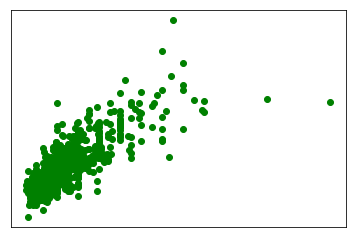

In [14]:
plt.scatter(y_test, y_pred,  color='green')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()